# Li recovery case study

Elvis Eugene, William Phillip, Alexander Dowling

Scripts to generate results for the Li recovery case study in _**Material property targets to enable adsorptive water treatment and resource recovery systems**_

#### Load  libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import multiscale_adsorption_target_models as mat # python model and workflow functions

#### Define constant parameters for Li recovery study

In [2]:
# output verbosity
print_level = 0

# Li+ concentration
# Approximated from Recovery of lithium from Uyuni salar brine by J.W.An et al. (doi:10.1016/j.hydromet.2012.02.008)
cin_wt_pct_Li = 0.1 # wt%
mw_Li = 6.941E-3 # g/mmol

# convert to mmol/cm3
cin_Li = (cin_wt_pct_Li / (100-cin_wt_pct_Li) ) / mw_Li # [mmol/cm3]

if print_level >=3:
    print("cin_Li =",cin_Li,"mmol/cm^3")
# END print

rho_Li = 0.534 # [g/cm3]

v_s_bar_Li = mw_Li / rho_Li # [cm3/mmol]

if print_level >= 3:
    print('v_s_bar_Li [cm3/mmol] = \n ',v_s_bar_Li)
# END print

# operating pressure
# approx pressure for nanofiltration membranes
delP_psi_Li = 200 # [psi]
delP_Li = delP_psi_Li * 6894.76 # [Pa]

# ratio of membrane masses to extract unit mass of Li
m_mem_ratio_matrix = np.array([25, 50, 100, 250, 500])

# path to existing adsorbent data
path = 'lithium_adsorbents_2.csv'

# sorbent properties and mass transfer characteristics
eps_bed = 0.4 # [-*], packed bed void fraction
eps_part = 0.57 # [-*], porosity of particle
rho_mat = 1 # g cm-3, density of sorbent matrix
n_ps = 1.46e9 # [-], number of pores per spherical particle
Np_mem = 1.6e14/100**2; # [1/cm2] number of pores per unit area of membrane
mu = 8.9e-4 # [Pa-s], viscosity of water at room temperature
D_AB = 1e-5 # [cm2/s] solute diffusivity

# volume to be treated and time for treatment
v_total_Li = 9.9e8 # cm3, volume to be treated
t_total = np.array([86400]) # s

# constants
n_a = 6.022e20 # [1/mmol] Avogadro's number

## Baseline membrane targets

#### Define parameters

In [3]:
# membrane thickness 
l_mem_baseline = 1e-3 # [m]

# membrane porosity
eps_mem_baseline = 0.3 # [-*]

case1_name = 'Li_baseline' # unique identifier for this case

#### Calculate material property targets and baseline membrane-based limits on material properties

In [4]:
K, QC_Li, K_qmax, qmax = mat.calc_lithium_targets(cin_Li, v_s_bar_Li, delP_Li, l_mem_baseline, eps_mem_baseline,
                                                  m_mem_ratio_matrix, t_total, batch_targets=False, removal_ratio=10, 
                                                  print_level=print_level, calc_masses=True, path=path, casename=case1_name)

Save material mass requirements to semicont_material_requirements_Li_baseline.csv


## Optimized membrane targets

#### Define parameters

In [5]:
# membrane thickness 
l_mem_opt = 0.3e-3 # [m]

# membrane porosity
eps_mem_opt = 0.5 # [-]

case2_name = 'Li_opt' # unique identifier for this case

#### Calculate material property targets and baseline membrane-based limits on material properties

In [6]:
K_opt, QC_Li_opt, K_qmax_opt, qmax_opt = mat.calc_lithium_targets(cin_Li, v_s_bar_Li, delP_Li, l_mem_opt, 
                                                                  eps_mem_opt, m_mem_ratio_matrix,
                                                                  t_total, batch_targets=False, 
                                                                  removal_ratio=10, print_level=print_level, 
                                                                  calc_masses=True, path=path,
                                                                  casename=case2_name)

Save material mass requirements to semicont_material_requirements_Li_opt.csv


## Packed bed design criteria

#### Calculate packed-bed design criteria

In [7]:
mat.qmax_heatmaps(case1_name,eps_bed,eps_part,eps_mem_baseline,cin_Li,v_s_bar_Li,
                  v_total_Li,t_total,delP_Li,K_lim=[-3,5],Q_lim=[-2,3],n_el=100,
                  plot_existing=False,K_exist=None,Q_exist=None,d_pore_min_max=[1e-7,1e-5],
                  d_pore_mem_min_max=[1e-7,1e-5],plot_contours=False)

Saved K values to Li_baselineK_x.csv
Saved Q values to Li_baselineQ_y.csv
Saved lub_bar values to Li_baselinelub_bar.csv


#### Plot MPT contours with bed design limits
This code generates Fig 4A of the manuscript

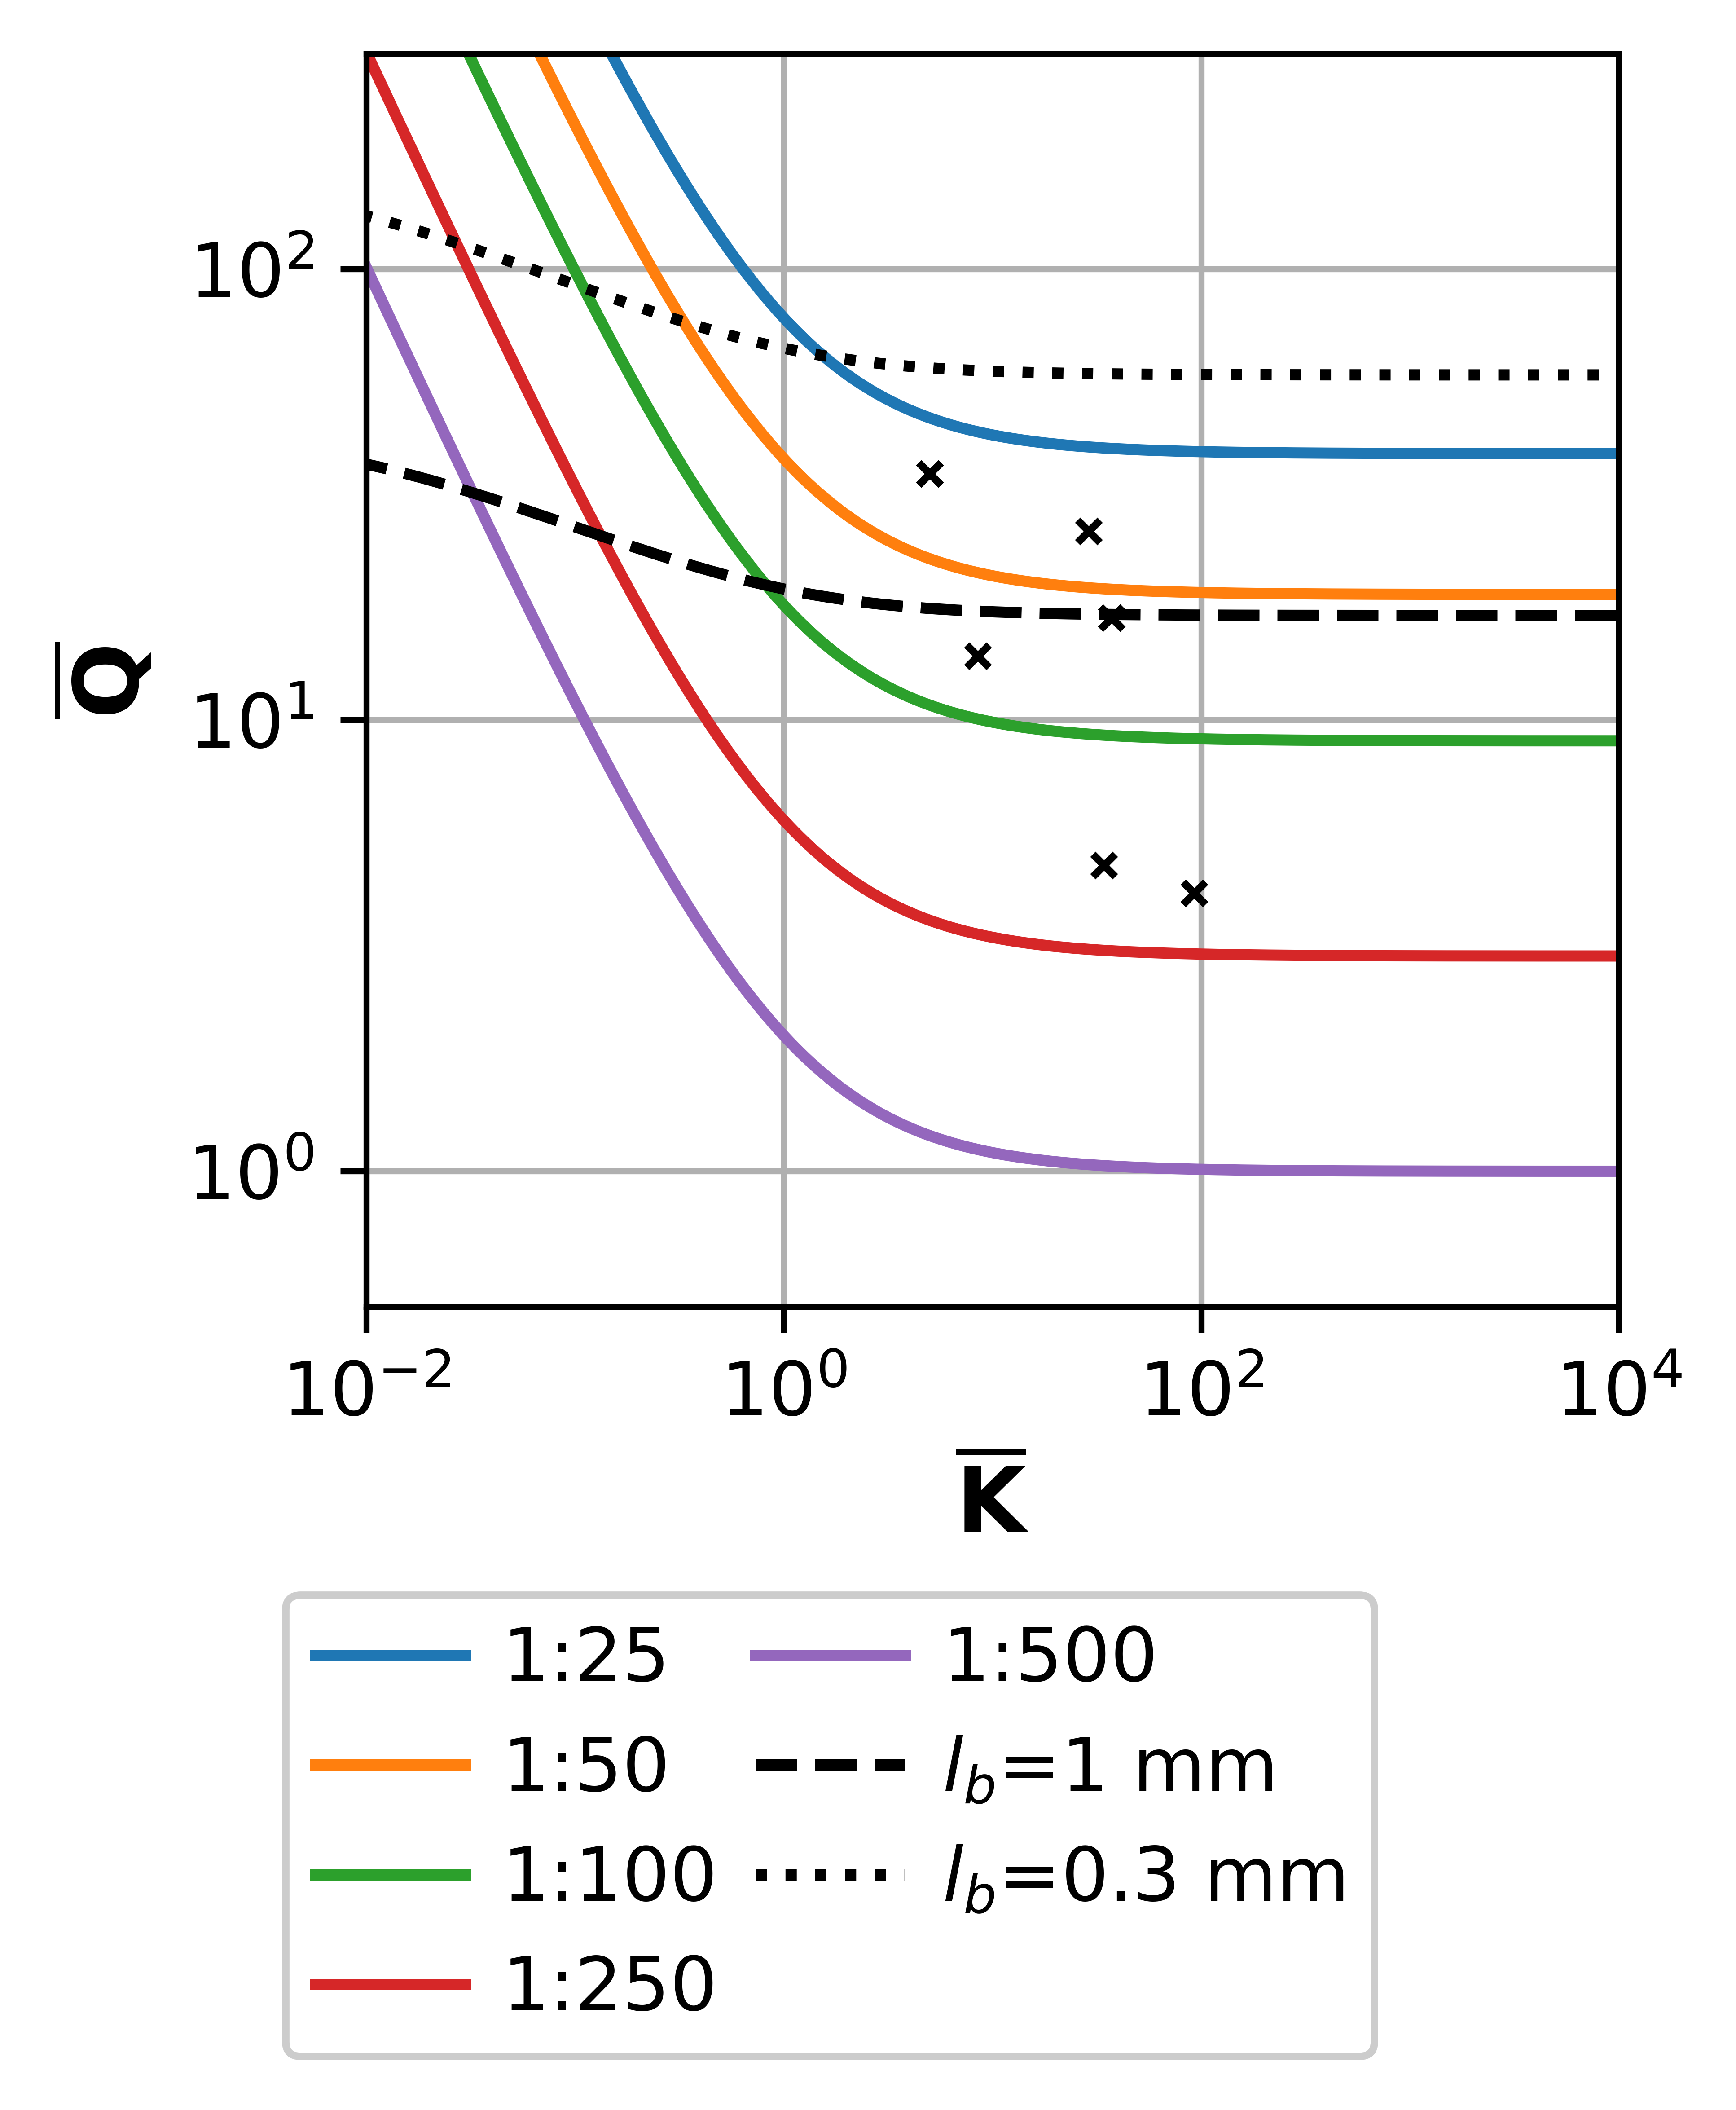

In [8]:
# assemble np.arrays for binding affinity and saturation capacity limits [baseline, optimized]
K_qmax_plot = np.array([K_qmax[0,:],K_qmax_opt[0,:]])
qmax_plot = np.array([qmax[0,:],qmax_opt[0,:]])

# define figure name
figname = 'Li_recovery_membrane'

fig_Li_case1_mem, ax_Li_case1_mem =\
mat.plot_lithium_targets(K_opt, QC_Li_opt, K_qmax_plot, qmax_plot, 
                         m_mem_ratio_matrix, cin_Li, eps_mem_opt, t_total,
                         path, figname, print_level=print_level, dimensionless=True,
                         combined_plot=True,
                         mem_Qmax_labels=['1 mm', '0.3 mm'])

# adjust axis limits
# format y-axis
plt.ylim(5e-1,3e2)
ax_Li_case1_mem.set_yticks([1e0,1e1,1e2])

# format x-axis
plt.xlim(1e-2,1e4)
ax_Li_case1_mem.set_xticks([1e-2,1e0,1e2,1e4])

# square aspect ratio
mat.set_aspect_ratio_log(ax_Li_case1_mem, 1.0)

# save figure again after updating aesthetics
plt.savefig(figname+'.png',dpi=300,bbox_inches='tight')

plt.show()

## Plot MPT contours with bed design criteria
This code generates Fig 4B of the manuscript

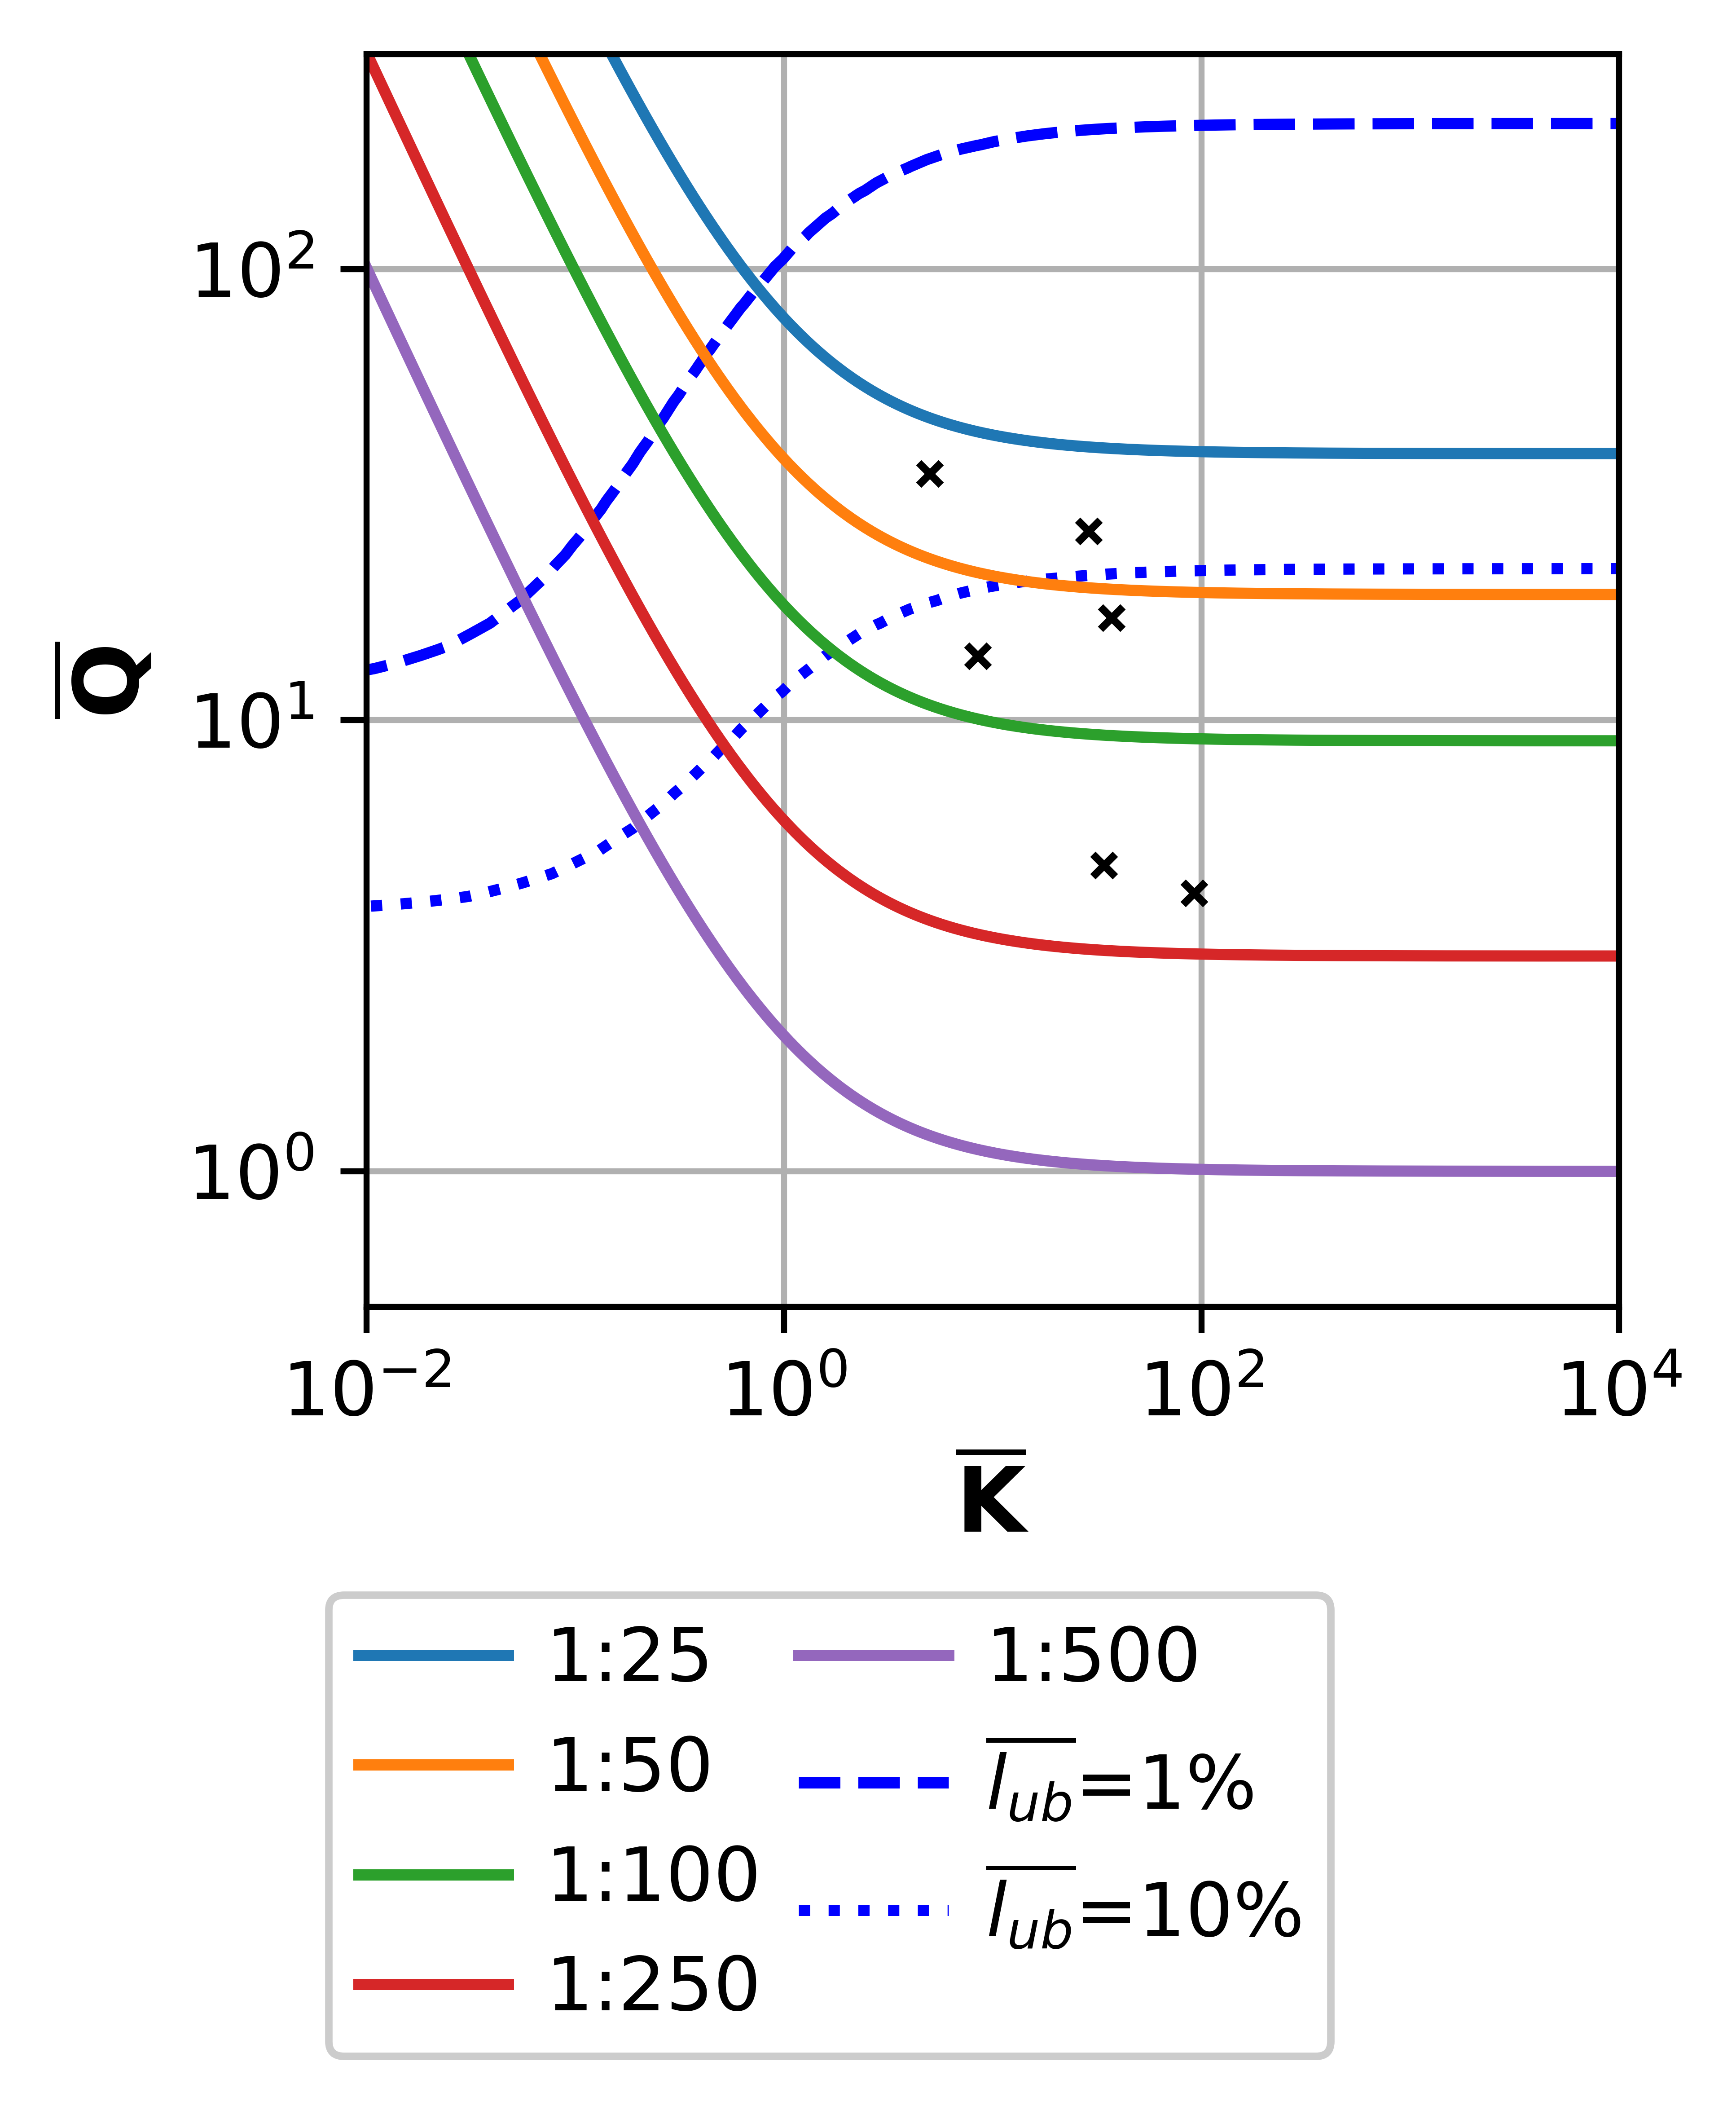

In [9]:
# assemble np.arrays for binding affinity and saturation capacity limits [baseline, optimized]
K_qmax_plot = np.array([K_qmax[0,:],K_qmax_opt[0,:]])
qmax_plot = np.array([qmax[0,:],qmax_opt[0,:]])

# define figure name
figname = 'Li_recovery_packedbed'

fig_Li_case1_pb, ax_Li_case1_pb =\
mat.plot_lithium_targets(K_opt, QC_Li_opt, K_qmax_plot, qmax_plot, 
                         m_mem_ratio_matrix, cin_Li, eps_mem_opt, t_total,
                         path, figname, print_level=print_level, dimensionless=True,
                         pbed_qmax_path = case1_name,
                         combined_plot=True,
                         mem_Qmax_labels=['1 mm', '0.3 mm'])

# adjust axis limits
# format y-axis
plt.ylim(5e-1,3e2)
ax_Li_case1_pb.set_yticks([1e0,1e1,1e2])

# format x-axis
plt.xlim(1e-2,1e4)
ax_Li_case1_pb.set_xticks([1e-2,1e0,1e2,1e4])

# square aspect ratio
mat.set_aspect_ratio_log(ax_Li_case1_pb, 1.0)

# save figure again after updating aesthetics
plt.savefig(figname+'.png',dpi=300,bbox_inches='tight')

plt.show()